# Creating a user review mock dataset

From https://www.mockaroo.com/, we created ten CSV files with 1000 data points each. Each file contains the following features:
- users id: randomly selected from a 2000-user-id list
- car: randomly chosen from a 345-car-names list
- comfort: randomly selected from a 1-5-rating range
- performance: randomly selected from a 1-5-rating range
- fuel economy: randomly selected from a 1-5-rating range
- interior design: chosen randomly from a 1-5-rating range
- exterior styling: randomly selected from a 1-5-rating range
- reliability: randomly chosen from a 1-5-rating range

Each row is a set of rating notes a user gives for a specific car. Thus, the entire dataset may contain multiple entries from a user who reviews different vehicles. Similarly, it may have multiple entries for a car that is assessed for different users.

The datasets will be merged, and duplicated reviews (i.e., a car that is reviewed for the same user more than once) will be removed. 

In [202]:
# Importing required libraries
import pandas as pd

# setting maximum character to display
pd.set_option('display.max_colwidth', 300)

In [203]:
# Creates a list with the file names
mock_list = []
for i in range(1, 11):
    mock_list.append('mock_user_review_{}'.format(i))

# Reads each CSV file, converts them into a dataframe
# Appends the dataframes into a list
# Concatenates the dataframes in the list
frames = []
for item in mock_list:
    path = '{}.csv'.format(item)
    dataframe = pd.read_csv(path)
    frames.append(dataframe)
df = pd.concat(frames)
df

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability
0,249,Romeo,3,1,1,1,2,1
1,1231,A63.0T,3,2,2,3,5,1
2,374,JourneyCrossroad,4,1,2,1,4,1
3,784,F-150Platinum,4,5,4,4,4,4
4,998,4,3,2,1,2,1,3
...,...,...,...,...,...,...,...,...
995,501,WRXPremium,3,4,3,1,1,4
996,1189,A4Season,2,2,4,2,5,2
997,1402,Malibu1LT,1,4,1,4,1,3
998,1202,HR-VEX,1,2,5,4,2,2


In [204]:
# The df dataframe index needs to be reset
# Insert a new index and make the older one a column
df.reset_index(inplace=True)
df.tail(2)

,index,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability
9998,998,1202,HR-VEX,1,2,5,4,2,2
9999,999,743,Express,5,2,5,4,1,1


In [205]:
# Drops previous index column
df = df.drop(columns='index')
df.head(3)

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability
0,249,Romeo,3,1,1,1,2,1
1,1231,A63.0T,3,2,2,3,5,1
2,374,JourneyCrossroad,4,1,2,1,4,1


In [206]:
df.tail()

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability
9995,501,WRXPremium,3,4,3,1,1,4
9996,1189,A4Season,2,2,4,2,5,2
9997,1402,Malibu1LT,1,4,1,4,1,3
9998,1202,HR-VEX,1,2,5,4,2,2
9999,743,Express,5,2,5,4,1,1


### Adding an rating column

According to the AutoTrader.ca review page (https://www.autotrader.ca/reviews/ ), owners provide reviews based on six features.
We will create the rating column that gets user review for each feature (comfort, performance, etc.) and returns the average value. 

The average value must range from 0 to 5. When we sum all the ratings up, the maximum result is 30. Thus, we need to divide the final result by 6 to get the result we want.  

Formula:

- avg: average
- I1: comfort
- I2: performance
- I3: fuel economy
- I4: interior design
- I5: exterior styling
- I6: reliability

$avg = \frac{I_{1}+I_{2}+I_{3}+I_{4}+I_{5}+I_{6}}{6}$



In [207]:
# Applies the formula above and rounds the average value
# The average value (final rating) will be set to a column called 'rating'
df['rating'] = round((df['comfort']+df['fuel_economy']
                 + df['fuel_economy']+df['interior_design'] 
                 + df['exterior_styling']+df['reliability'])/6, 1)
df.head()

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability,rating
0,249,Romeo,3,1,1,1,2,1,1.5
1,1231,A63.0T,3,2,2,3,5,1,2.7
2,374,JourneyCrossroad,4,1,2,1,4,1,2.3
3,784,F-150Platinum,4,5,4,4,4,4,4.0
4,998,4,3,2,1,2,1,3,1.8


### Removing duplicated reviews

In [208]:
# creat a new column to help remove duplicated values
# Items from 'user_id_car' column will be a string 
# originated from user id value and car name join
df['user_id_car'] = df['user_id'].astype(str) + df['car'].astype(str)
df

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability,rating,user_id_car
0,249,Romeo,3,1,1,1,2,1,1.5,249Romeo
1,1231,A63.0T,3,2,2,3,5,1,2.7,1231A63.0T
2,374,JourneyCrossroad,4,1,2,1,4,1,2.3,374JourneyCrossroad
3,784,F-150Platinum,4,5,4,4,4,4,4.0,784F-150Platinum
4,998,4,3,2,1,2,1,3,1.8,9984
...,...,...,...,...,...,...,...,...,...,...
9995,501,WRXPremium,3,4,3,1,1,4,2.5,501WRXPremium
9996,1189,A4Season,2,2,4,2,5,2,3.2,1189A4Season
9997,1402,Malibu1LT,1,4,1,4,1,3,1.8,1402Malibu1LT
9998,1202,HR-VEX,1,2,5,4,2,2,3.2,1202HR-VEX


In [209]:
# Checks for duplicated values in 'user_id_car' column
# Checks for the df dataframe length
sum_dup = df.duplicated('user_id_car').sum()
print('Duplicated: ', sum_dup, '\nDataframe length: ', df.shape[0])

Duplicated:  75 
Dataframe length:  10000


In [210]:
# Drops duplicates rows
# Checks for duplicated values again
# Checks for the df dataframe length again
df.drop_duplicates('user_id_car', inplace=True)
sum_dup = df.duplicated('user_id_car').sum()
print('Duplicated: ', sum_dup, '\nDataframe length: ', df.shape[0])

Duplicated:  0 
Dataframe length:  9925


In [211]:
# Dropps 'user_id_car' column as it's no longer useful
df.drop('user_id_car', axis=1, inplace=True)
df.head()

,user_id,car,comfort,performance,fuel_economy,interior_design,exterior_styling,reliability,rating
0,249,Romeo,3,1,1,1,2,1,1.5
1,1231,A63.0T,3,2,2,3,5,1,2.7
2,374,JourneyCrossroad,4,1,2,1,4,1,2.3
3,784,F-150Platinum,4,5,4,4,4,4,4.0
4,998,4,3,2,1,2,1,3,1.8


### Exploratory Data Analysis and Visualization

In [212]:
# Groups by user 
user_grouped = pd.DataFrame(df.groupby(by='user_id')['car'].count())
user_grouped.rename(columns={'car':'review_count'}, inplace=True)
user_grouped.head()

,review_count
user_id,
1,2
2,7
3,6
4,9
5,2


In [213]:
user_grouped.reset_index(inplace=True)

In [214]:
user_grouped

,user_id,review_count
0,1,2
1,2,7
2,3,6
3,4,9
4,5,2
...,...,...
1985,1996,9
1986,1997,7
1987,1998,1
1988,1999,2


In [215]:
user_grouped.describe()

,user_id,review_count
count,1990.000000,1990.000000
mean,1000.428643,4.987437
std,577.847365,2.147020
min,1.000000,1.000000
25%,499.250000,3.000000
50%,1000.500000,5.000000
75%,1500.750000,6.000000
max,2000.000000,13.000000


In [216]:
# Groups by car 
car_grouped = pd.DataFrame(df.groupby(by='car')['user_id'].count())
car_grouped.rename(columns={'user_id':'review_count'}, inplace=True)
car_grouped.head()

,review_count
car,
124,39
200LX,42
200Limited,32
3,33
300300C,40


###  Grouping and ranking

In [217]:
# Creates a dataframe that contains the mean of 
# the total rating for each car rating
rating = pd.DataFrame(df.groupby('car')['rating'].mean())
rating.rename(columns={'rating':'rating_mean'}, inplace=True) # changing the 'rating' column name for 'rating_mean'
rating.head(10)

,rating_mean
car,
124,2.830769
200LX,3.100000
200Limited,3.046875
3,2.927273
300300C,2.965000
300300S,3.065000
300Limited,3.066667
4,2.987500
488,3.097500


In [218]:
# Adds a 'count' column to the rating dataframe 
# that displays the counts for the number of reviews
rating['rating_count'] = pd.DataFrame(df.groupby('car')['rating'].count())
rating.head(10)

,rating_mean,rating_count
car,,
124,2.830769,39
200LX,3.100000,42
200Limited,3.046875,32
3,2.927273,33
300300C,2.965000,40
300300S,3.065000,40
300Limited,3.066667,33
4,2.987500,32
488,3.097500,40


In [219]:
# Get statistics
# We can notice that there are 287 unique cars reviewed
# The maximum value is 3.07 and the minimum is 0.1
rating.describe()

,rating_mean,rating_count
count,287.000000,287.000000
mean,3.005022,34.581882
std,0.109265,5.897678
min,2.694286,19.000000
25%,2.928110,31.000000
50%,3.008333,34.000000
75%,3.077124,38.500000
max,3.340541,50.000000


In [220]:
# To see the most popular car in the dataset has 50 reviews
# Sorting the rating dataset by rating_count, we can see
# that the car A6Premium is the most popular one
rating.sort_values('rating_count', ascending=False).head(10)

,rating_mean,rating_count
car,,
A6Premium,3.052000,50
Santa,3.118750,48
EdgeSE,3.035417,48
LCLC,3.091489,47
SQ5Premium,3.021277,47
TraxFWD,3.028261,46
Civic,3.045652,46
ChallengerSRT,2.971739,46
ExpeditionXLT,3.002174,46


### Visualization

In [221]:
# Imports required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(8,5), dpi= 80)
%matplotlib inline

In [222]:
# help(sns.histplot)

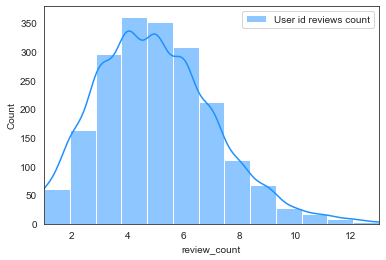

In [223]:
# Prints the distribution and adds a smooth density curve as 
# a line for the number of observations of user reviews
sns.histplot(user_grouped['review_count'], bins=13, color="dodgerblue", kde=True, label="User id reviews count")
minimum = user_grouped['review_count'].min()
maximum = user_grouped['review_count'].max()
plt.xlim(minimum, maximum)
plt.legend()
plt.show()

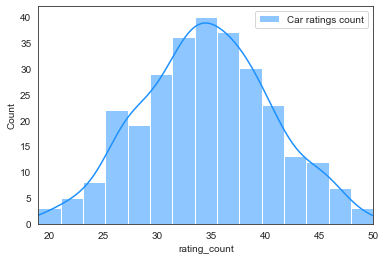

In [224]:
# Prints the distribution and adds a smooth density curve as 
# a line for the number of observations of the count of
# ratings given for cars
sns.histplot(rating['rating_count'], bins=15, color="dodgerblue", kde=True, label="Car ratings count")
minimum = rating['rating_count'].min()
maximum = rating['rating_count'].max()
plt.xlim(minimum, maximum)
plt.legend()
plt.show()

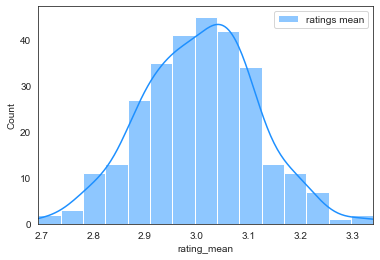

In [225]:
# Prints the distribution and adds a smooth density curve as 
# a line for the number of observations of the count of
# ratings mean
sns.histplot(rating['rating_mean'], bins=15, color="dodgerblue", kde=True, label="ratings mean")
minimum = rating['rating_mean'].min()
maximum = rating['rating_mean'].max()
plt.xlim(minimum, maximum)
plt.legend()
plt.show()